### Iris dataset classification

This is one of a few notebooks designed to showcase how Conveyor can make your work in Jupyter more organized. The objective of this example is to seperate the Iris dataset classification task (covered [here](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)) into smaller subtasks, from exploratory data analysis to evaluating different classification strategies.

In [1]:
import conveyor

Last notebook, we decided to try and use the areas of the flowers' petals and sepals to classify the flower types. Let's start by grabbing those values from our last notebook using Conveyor's nbglobals module.

In [2]:
conveyor.run_notebook("Exploring Iris.ipynb", import_globals=True)
from conveyor.nbglobals import flower_areas, iris_y

In [3]:
# We organized this list such that each entry is of the form
# [sepal area, petal area]
flower_areas

[[17.849999999999998, 0.27999999999999997],
 [14.700000000000001, 0.27999999999999997],
 [15.040000000000001, 0.26],
 [14.26, 0.30000000000000004],
 [18.0, 0.27999999999999997],
 [21.060000000000002, 0.68],
 [15.639999999999999, 0.42],
 [17.0, 0.30000000000000004],
 [12.76, 0.27999999999999997],
 [15.190000000000001, 0.15000000000000002],
 [19.980000000000004, 0.30000000000000004],
 [16.32, 0.32000000000000006],
 [14.399999999999999, 0.13999999999999999],
 [12.899999999999999, 0.11000000000000001],
 [23.2, 0.24],
 [25.080000000000002, 0.6000000000000001],
 [21.060000000000002, 0.52],
 [17.849999999999998, 0.42],
 [21.66, 0.51],
 [19.38, 0.44999999999999996],
 [18.36, 0.34],
 [18.87, 0.6000000000000001],
 [16.56, 0.2],
 [16.83, 0.85],
 [16.32, 0.38],
 [15.0, 0.32000000000000006],
 [17.0, 0.6400000000000001],
 [18.2, 0.30000000000000004],
 [17.68, 0.27999999999999997],
 [15.040000000000001, 0.32000000000000006],
 [14.879999999999999, 0.32000000000000006],
 [18.36, 0.6000000000000001],
 [

For this example notebook, you'll need the scikit-learn library. You can install it using `pip install -U scikit-learn`. It contains a variety of tools that will allows us to test different classification methods easily. First, let's see how well linear regression works to predict flower class using area.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    flower_areas, iris_y, test_size=0.33, random_state=42)

Let's try and make a plot to see how well linear regression fits our area data...

Text(0.5, 1.0, 'Regression results vs. Actual class')

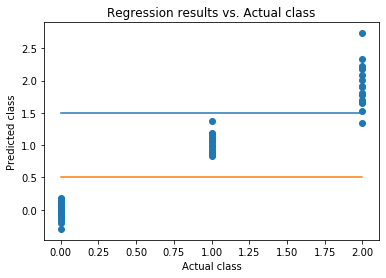

In [5]:
import matplotlib.pyplot as plt 
plt.figure()

reg = LinearRegression().fit(X_train, y_train)

plt.scatter(y_test, reg.predict(X_test))

plt.plot([0.0,1.0,2.0],[1.5, 1.5, 1.5])
plt.plot([0.0,1.0,2.0],[0.5, 0.5, 0.5])
plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Regression results vs. Actual class")

That looks pretty good! We can completely separate classes 0 and 1 in the test data we have available. There is some misclassification between classes 1 and 2, however.

In [6]:
reg = LinearRegression().fit(X_train, y_train)
predictions = []

for prediction in reg.predict(X_test):
    res = int(round(prediction))
    if res > 2:
        res = 2
    if res < 0:
        res = 0
    predictions.append(res)

Let's see how well we did...

In [7]:
n_correct = 0
n_total = len(predictions)

for idx in range(len(y_test)):
    if y_test[idx] == predictions[idx]:
        n_correct += 1
        
n_correct/float(n_total)

0.98